# Comp5318 - Week 9 - Tutorial - Transformer Architecture
#### Made By: Tung Anh Nguyen - PhD in School of Computer Science - University of Sydney

The **original Transformer** is based on the **encoder-decoder** architecture that is widely used for tasks like machine translation, where a sequence of words is translated from one language to another. This architecture consists of two components:


1. **Encoder-only**: These models convert an input sequence of text into a rich numerical representation that is well suited for tasks like text classification or named entity recognition. BERT and its variants, like RoBERTa and DistilBERT, belong to this class of architectures. The representation computed for a given token in this architecture depends both on the left (before the token) and the right (after the token) contexts. This is often called bidirectional attention.


2. **Decoder-only**: Given a prompt of text like “Thanks for lunch, I had a...” these models will auto- complete the sequence by iteratively predicting the most probable next word. The family of GPT models belong to this class. The representation computed for a given token in this architecture depends only on the left context. This is often called causal or autoregressive attention.


3. **Encoder-decoder**: These are used for modeling complex mappings from one sequence of text to another.

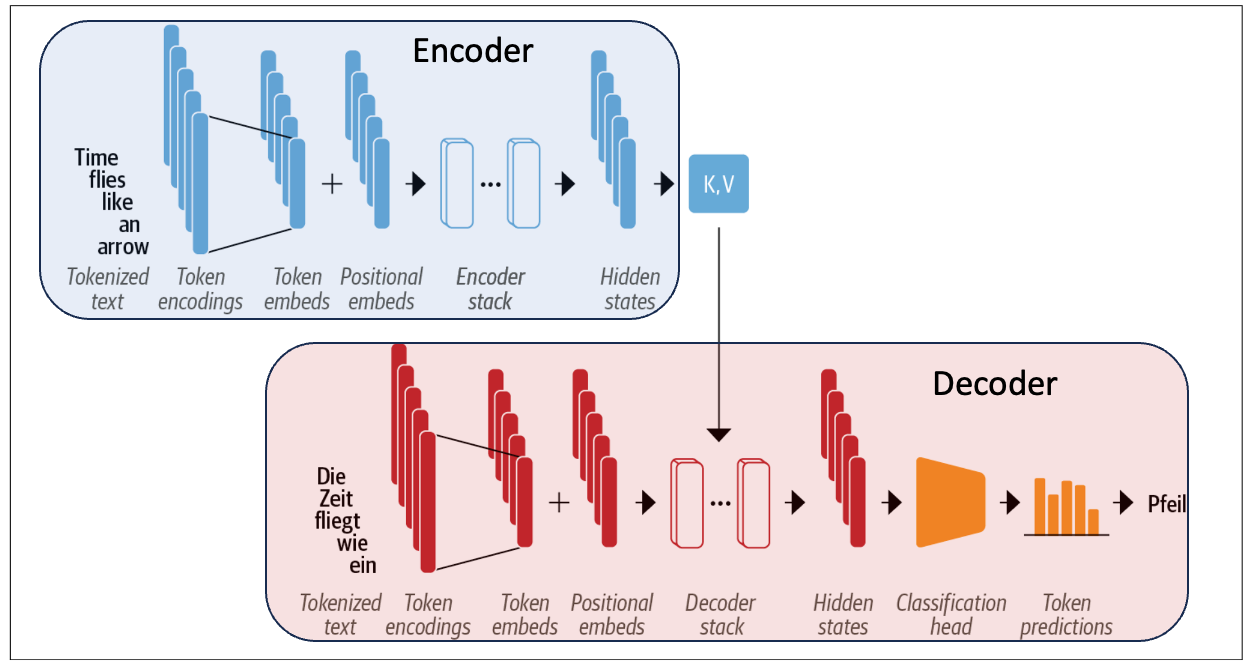



# Popular architectures in the Transformer-based family
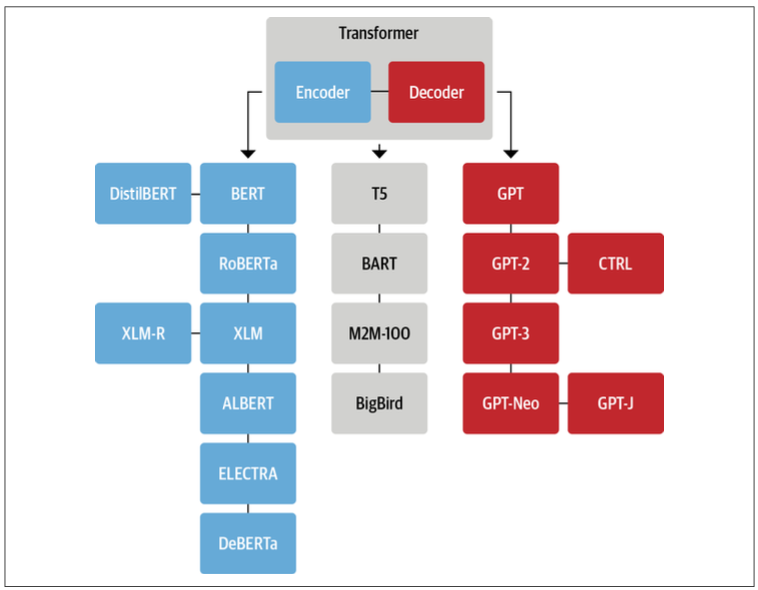

# Students are recommeded to use google colab to avoid computational burden!
## Students can enable GPU in google colab as followings:
1. Choose Runtime in google colab.
2. Choose Change Runtime Type.
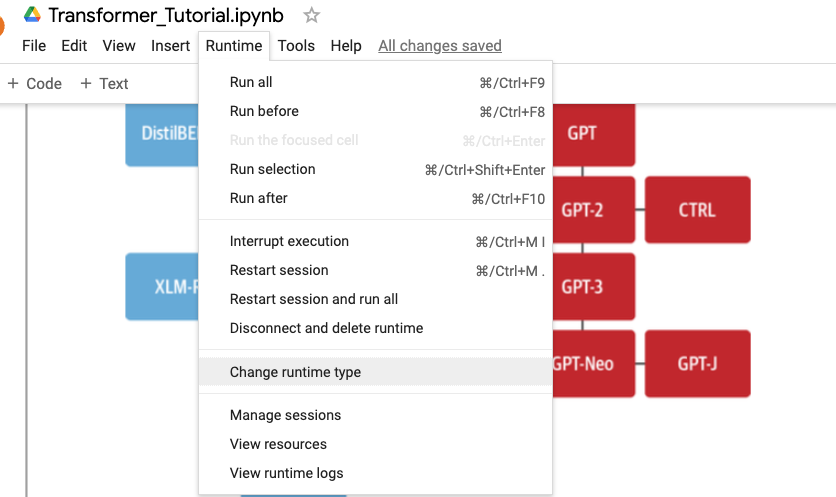
3. Choose T4 GPU.

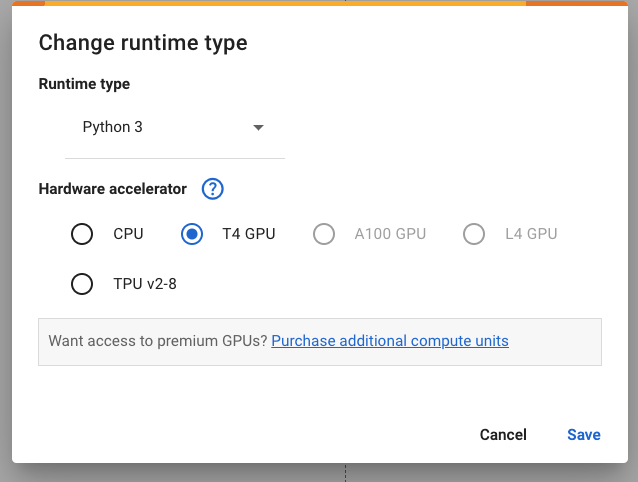

In [1]:
# Install library for visualizing attention mechanism of transformer
!pip install bertviz

# If students run on their local machine, students will need to install transformers. Use the following installation:
# !pip install transformers

     ---------------------------------------- 0.0/50.1 kB ? eta -:--:--
     ---------------------------------------- 50.1/50.1 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/157.6 kB ? eta -:--:--
   -------------------------------------- - 153.6/157.6 kB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 157.6/157.6 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/139.1 kB ? eta -:--:--
   ---------------------------------------- 139.1/139.1 kB ? eta 0:00:00
   ---------------------------------------- 0.0/991.7 kB ? eta -:--:--
   --------------------------------------  983.0/991.7 kB 31.4 MB/s eta 0:00:01
   --------------------------------------- 991.7/991.7 kB 20.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.6/12.6 MB 20.5 MB/s eta 0:00:01
   ---- ----------------------------------- 1.6/12.6 MB 19.8 MB/s eta 0:00:01
   ------- -----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Task1: Exploring Attention Mechanism
## To do:


1. Run the following code and select a layer and head to explore.
2. Use the expand option to investigate the attention mechanism implemented by Q x K.

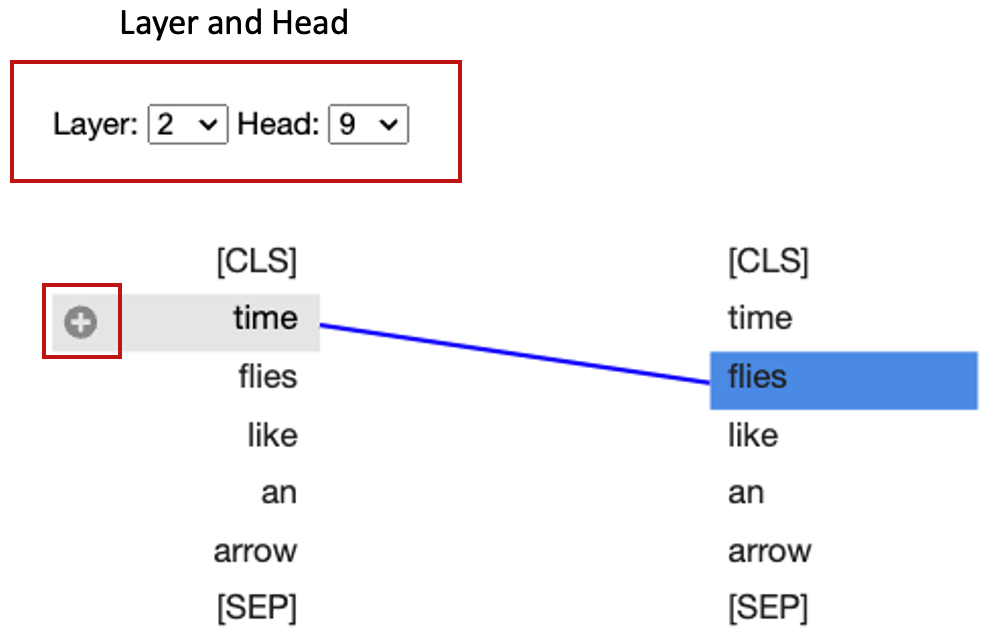



In [2]:
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show

model_ckpt = "bert-base-uncased" # Load model check point by name - We are using a BERT model
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = BertModel.from_pretrained(model_ckpt)
text = "time flies like an arrow"
show(model, "bert", tokenizer, text, display_mode="light", layer=0, head=8)

c:\Users\AD\miniconda3\envs\DNNtest\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\AD\miniconda3\envs\DNNtest\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\AD\miniconda3\envs\DNNtest\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\AD\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Demystifying Text Generation with GPT
## Formular to generate text with GPT:
Like other autoregressive or causal language models, GPT is pretrained to estimate the probability $P(y|x)$ of a sequence of tokens $y = y_1, \ldots y_t$ occurring in the text, given some initial prompt or context sequence $x = x_1, \ldots x_t$. Since it is impractical to acquire enough training data to estimate $P(y|x)$ directly, it is common to use the chain rule of probability to factorize it as a product of conditional probabilities:

$P(y = y_1, \ldots y_t|x)=∏_{t=1}^NP(y_t|y_1, \ldots y_{t-1},x)$.

## Generating text from an input sequence by adding a new word to the input at each step

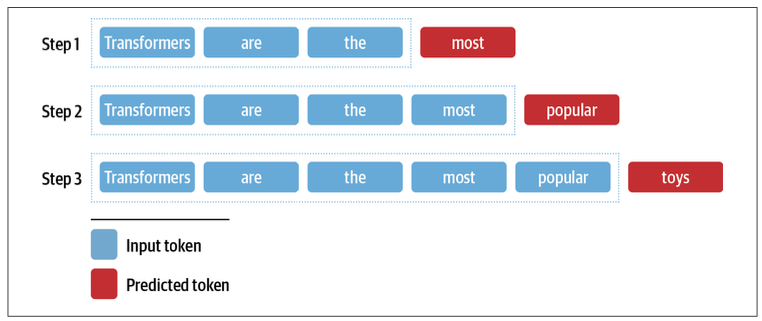

*The process of selecting the new "word" can be simplified as searching for the most likely overall sequence $y$ picking a by picking a $\hat{y}$ such that:*

$\hat{y}=P(y|x)$

## The Challenge with Generating Coherent Text:
The *quality* and *diversity* of the generated text.


# Task2: Generating Text with GPT-2
## To do:
1. Run the following code 3 times with different `n_steps` and `choices_per_step`
2. What is the potential problem of Greedy Search for GPT?

In [3]:
'''Get GPT2-model'''
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Get GPU if possible
device = "cuda" if torch.cuda.is_available() else "cpu"

model_name = "gpt2-xl"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

c:\Users\AD\miniconda3\envs\DNNtest\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\AD\.cache\huggingface\hub\models--gpt2-xl. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


KeyboardInterrupt: 

# Greedy Search for GPT
The simplest decoding method to get discrete tokens from a model’s continuous output is to greedily select the token with the highest probability at each timestep:

$\hat{y_t} = \arg\max_{y_t} P(y_t \mid y_1, \ldots y_{t-1},x)$

In [3]:
import pandas as pd
input_txt = "Transformers are the"
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
iterations = []
n_steps = 8 # Students can varies the value of n_steps to see the effect on final results
choices_per_step = 5 # Students can varies the value of choices_per_step to see the effect on final results

'''The following code iterates through `n_steps` to generate the next words based on a given text sequence.
- Inputs:
  + input_txt (str): The text sequence.
  + n_steps (int): The number of words to generate.
  + choices_per_step (int): The number of choices for each step.
- Output:
  + iterations (pandas DataFrame): The iteration results.
'''

with torch.no_grad():
  for _ in range(n_steps):
    iteration = dict()
    iteration["Input"] = tokenizer.decode(input_ids[0])
    output = model(input_ids=input_ids)
    # Select logits of the first batch and the last token and apply softmax
    next_token_logits = output.logits[0, -1, :]
    next_token_probs = torch.softmax(next_token_logits, dim=-1)
    sorted_ids = torch.argsort(next_token_probs, dim=-1, descending=True) # Store tokens with highest probabilities
    for choice_idx in range(choices_per_step):
      token_id = sorted_ids[choice_idx]
      token_prob = next_token_probs[token_id].cpu().numpy()
      token_choice = (
          f"{tokenizer.decode(token_id)} ({100 * token_prob:.2f}%)"
      )
      iteration[f"Choice {choice_idx+1}"] = token_choice
    # Append predicted next token to input
    input_ids = torch.cat([input_ids, sorted_ids[None, 0, None]], dim=-1)
    iterations.append(iteration)
pd.DataFrame(iterations)

,Input,Choice 1,Choice 2,Choice 3,Choice 4,Choice 5
0,Transformers are the,most (8.53%),only (4.96%),best (4.65%),Transformers (4.37%),ultimate (2.16%)
1,Transformers are the most,popular (16.78%),powerful (5.37%),common (4.96%),famous (3.72%),successful (3.20%)
2,Transformers are the most popular,toy (10.63%),toys (7.23%),Transformers (6.60%),of (5.46%),and (3.76%)
3,Transformers are the most popular toy,line (34.38%),in (18.20%),of (11.71%),brand (6.10%),line (2.69%)
4,Transformers are the most popular toy line,in (46.28%),of (15.09%),", (4.94%)",on (4.40%),ever (2.72%)
5,Transformers are the most popular toy line in,the (65.99%),history (12.42%),America (6.91%),Japan (2.44%),North (1.40%)
6,Transformers are the most popular toy line in the,world (69.26%),United (4.55%),history (4.29%),US (4.23%),U (2.30%)
7,Transformers are the most popular toy line in ...,", (39.73%)",. (30.64%),and (9.87%),with (2.32%),today (1.74%)


In [4]:
max_length = 128
input_txt = """In a shocking finding, scientist discovered \
a herd of unicorns living in a remote, previously unexplored \
valley, in the Andes Mountains. Even more surprising to the \
researchers was the fact that the unicorns spoke perfect English.\n\n
"""
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output_greedy = model.generate(input_ids, max_length=max_length,do_sample=False)
print(tokenizer.decode(output_greedy[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.


The researchers, from the University of California, Davis, and the University of Colorado, Boulder, were conducting a study on the Andean cloud forest, which is home to the rare species of cloud forest trees.


The researchers were surprised to find that the unicorns were able to communicate with each other, and even with humans.


The researchers were surprised to find that the unicorns were able


# Beam Search Decoding

Instead of decoding the token with the highest probability at each step, beam search keeps track of the top-b most probable next tokens, where b is referred to as the number of `beams` or `partial hypotheses`.

$logP(y_1, \ldots, y_t) = ∑_{t=1}^N logP(y_t \mid y_1, \ldots y_{t-1},x)$.

An example of beam search with two beams:
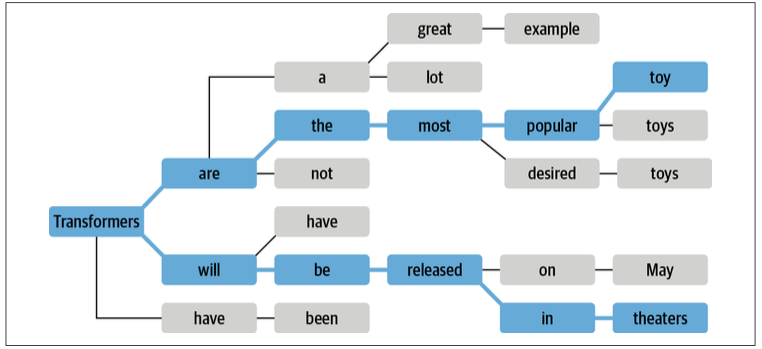

#Question: How can Beam Search Decoding solve problem in Greedy Decoding?
### Hint: Try to investigate the difference between two formulas.

Answer:
- Greedy Decoding always picks the highest-probability word at each step, meaning there’s no exploration of other possibly better sequences. As a result, it tends to generate repetitive and less diverse outputs, especially in longer sentences.
- Beam Search uses a cumulative score to evaluate sequences, which allows it to consider the entire history of the generated sequence up to the current step. At each step, the scores of all beams are updated with the log-probabilities of the newly generated tokens. This cumulative scoring ensures that Beam Search chooses sequences that have good overall scores rather than just focusing on a single token at a time. This helps Beam Search produce more globally coherent sequences because it looks at the entire path rather than evaluating each step independently. 


#The Sequence Log Probability of the Greedy Decoder

In [5]:
import torch.nn.functional as F
def log_probs_from_logits(logits, labels):
  '''
  This function transforms the logits (raw model outputs) into log probabilities using softmax and extracts the log probabilities corresponding to the labels.
  - Inputs:
    + logits: A tensor of shape (batch_size, seq_length, vocab_size) containing the model's raw outputs for each token in the sequence.
    + labels: A tensor of shape (batch_size, seq_length) containing the indices of the true labels for each token in the sequence.
  - Outputs:
    + log_probs: A tensor of shape (batch_size, seq_length) containing the
      log-probabilities of the true labels for each token in the sequence.
  '''
  logp = F.log_softmax(logits, dim=-1)
  logp_label = torch.gather(logp, 2, labels.unsqueeze(2)).squeeze(-1)
  return logp_label

def sequence_logprob(model, labels, input_len=0):
  '''
  This function calculates the total log probability of a sequence of labels given a model.
  - Inputs:
    + model: A model that takes a tensor of shape (batch_size, seq_length) and returns a tensor of shape (batch_size, seq_length, vocab_size).
    + labels: A tensor of shape (batch_size, seq_length) containing the the labels for each token in the sequence.
    + input_len: An integer indicating the number of tokens in the input sequence.
  - Outputs:
    + seq_log_prob: A float tensor of shape (1,) containing the total log probability of the sequence.
  '''
  with torch.no_grad():
    output = model(labels)
    log_probs = log_probs_from_logits(output.logits[:, :-1, :], labels[:, 1:])
    seq_log_prob = torch.sum(log_probs[:, input_len:])
  return seq_log_prob.cpu().numpy()

logp = sequence_logprob(model, output_greedy, input_len=len(input_ids[0]))
print(tokenizer.decode(output_greedy[0]))
print(f"\nlog-prob: {logp:.2f}")

In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.


The researchers, from the University of California, Davis, and the University of Colorado, Boulder, were conducting a study on the Andean cloud forest, which is home to the rare species of cloud forest trees.


The researchers were surprised to find that the unicorns were able to communicate with each other, and even with humans.


The researchers were surprised to find that the unicorns were able

log-prob: -87.43


# Beam Search Implementation
Now let’s compare this to a sequence that is generated with beam search. To activate beam search with the generate() function we just need to specify the number of beams with the num_beams parameter. The more beams we choose, the better the result potentially gets; however, the generation process becomes much slower since we generate parallel sequences for each beam:

In [9]:
output_beam = model.generate(input_ids, max_length=max_length, num_beams=5, do_sample=False)
logp = sequence_logprob(model, output_beam, input_len=len(input_ids[0]))
print(tokenizer.decode(output_beam[0]))
print(f"\nlog-prob: {logp:.2f}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.


The discovery of the unicorns was made by a team of scientists from the University of California, Santa Cruz, and the National Geographic Society.


The scientists were conducting a study of the Andes Mountains when they discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English

log-prob: -55.23


-> *We can see that we get a better log probability (higher is better) with beam search than we did with simple greedy decoding*

#Sampling Methods
The simplest sampling method is to randomly sample from the probability distribution of the model’s outputs over the full vocabulary at each timestep:

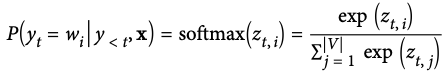

where |V| denotes the cardinality of the vocabulary. We can easily control the diversity of the output by adding a temperature parameter T that rescales the logits before taking the softmax:

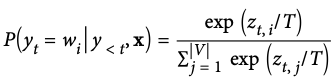

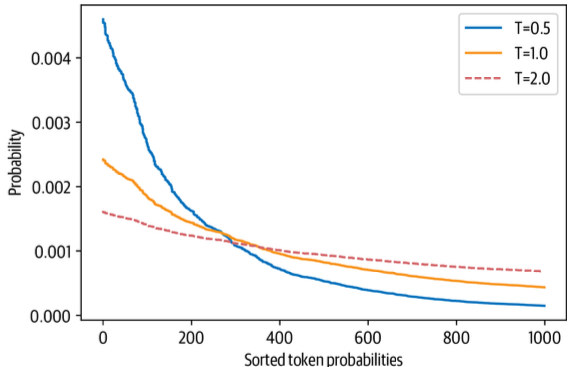

To see how we can use temperature to influence the generated text, let’s sample with `T = 2` by setting the temperature parameter in the `generate()` function (we’ll explain the meaning of the `top_k` parameter in the next section):

# Task 3: Investigate Sampling Method
# To do:
1. Try different values of `temperature: T`.
2. Question: What happens if `T` is large? What happens if `T` is small?

In [ ]:
output_temp = model.generate(input_ids, max_length=max_length, do_sample=True, temperature=2.0, top_k=0)
print(tokenizer.decode(output_temp[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.


Domain-team Aliccup comm explaining musural temperament detachment etc Dehhh Vill rid bee''. o Element Religion pees Triumph open ANDtten Olive i Camera Voice Restore GasVolume silk pagellinessra recommend turnovers Balloon venue omitting succ SlipmaskBoo is Curtis Klein.</ blastical Hicksha revenervould encounter Facts Moderation mahurt chron loc interruption unscream Promise Fancy orb 143 Literary insistence Refugees Prior compound Rusty


Answer: 
- A higher temperature (> 1) makes the distribution more uniform, increasing the randomness of the sampling process. This leads to more creative but possibly less coherent outputs.
- A lower temperature (< 1) makes the distribution sharper, giving higher preference to the tokens with the highest probability, resulting in more deterministic and conservative outputs.
- A temperature of 1 keeps the original probability distribution unchanged.

# Top-k and Nucleus Sampling
Top-k and nucleus (top-p) sampling are two popular alternatives or extensions to using temperature. In both cases, the basic idea is to restrict the number of possible tokens we can sample from at each timestep.
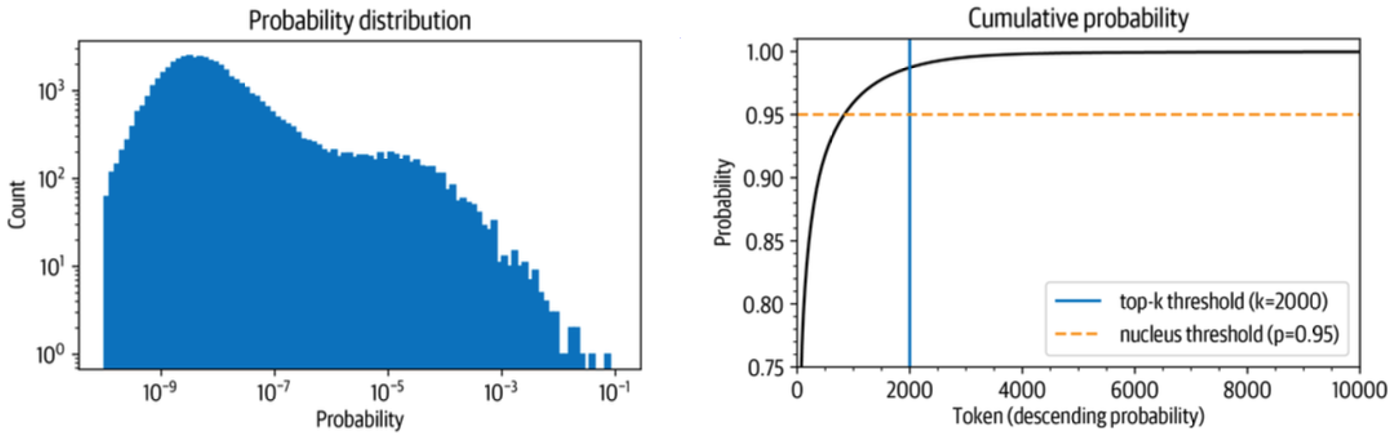

#Top-k:
***The idea behind top-k sampling is to avoid the low-probability choices by only sam‐ pling from the k tokens with the highest probability***. This puts a fixed cut on the long tail of the distribution and ensures that we only sample from likely choices. Going back to figure, top-k sampling is equivalent to defining a vertical line and sam‐ pling from the tokens on the left.

In [ ]:
output_topk = model.generate(input_ids, max_length=max_length, do_sample=True, top_k=50)
print(tokenizer.decode(output_topk[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.


The researchers first found the herd of unicorns in 2008, in a private valley in Ecuador. They found that there were only two adult unicorns – one from the females and one from the males.

Onlookers were initially perplexed as to how the creatures could have reached the valley without anyone noticing.

However, in 2010 (only a year after the discovery), the scientists returned to


#Nucleus (top-p):
With nucleus or top-p sampling, instead of choosing a fixed cutoff value, we set a condition of when to cut off. ***This condition is when a certain probability mass in the selection is reached***.

In [ ]:
output_topp = model.generate(input_ids, max_length=max_length, do_sample=True, top_p=0.90)
print(tokenizer.decode(output_topp[0]))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In a shocking finding, scientist discovered a herd of unicorns living in a remote, previously unexplored valley, in the Andes Mountains. Even more surprising to the researchers was the fact that the unicorns spoke perfect English.


The first of these remarkable creatures was found in 2007 on a mountain known as Llanos del Mar, in South America, which is a few miles from the Venezuelan border.


The discovery was made by the Mexican government in partnership with the Argentine Ministry of Foreign Relations. The researchers have named the unicorn Equestrada por el Fuego (The Wonder of the Mountains).


In a


## Acknowledgements

This tutorial is based on:
Natural Language Processing with Transformers.

by Lewis Tunstall, Leandro von Werra, Thomas Wolf
Released May 2022

Publisher(s): O'Reilly Media, Inc.

ISBN: 9781098136796